In [43]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [44]:
df = pd.read_csv('../idena_v1.csv')

df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume,twitter_followers,reddit_average_posts_48h,reddit_average_comments_48h,reddit_subscribers,reddit_accounts_active_48h,idena_unscaled,idena_monthly,scale,idena
2020-08-11,2020-08-11,0.125496,0.137770,0.124239,0.130634,0.130634,40783,1817.0,0.273,0.000,298,6.666667,0,37.0,0.37,0.00
2020-08-12,2020-08-12,0.130674,0.162275,0.128384,0.138122,0.138122,65517,1829.0,0.182,0.091,300,6.750000,0,37.0,0.37,0.00
2020-08-13,2020-08-13,0.138128,0.138128,0.118348,0.127606,0.127606,41988,2149.0,0.083,0.167,302,6.615385,0,37.0,0.37,0.00
2020-08-14,2020-08-14,0.127084,0.201024,0.121670,0.201024,0.201024,104705,2208.0,0.000,0.000,304,7.083333,34,37.0,0.37,12.58
2020-08-15,2020-08-15,0.201097,0.202423,0.138915,0.162744,0.162744,50419,2267.0,0.100,0.000,307,5.636364,0,37.0,0.37,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31,2022-01-31,0.083146,0.083205,0.078528,0.081419,0.081419,157240,9584.0,0.091,0.000,925,10.083333,54,30.0,0.30,16.20
2022-02-01,2022-02-01,0.081419,0.085588,0.081330,0.084601,0.084601,149344,9593.0,0.083,0.167,926,10.153846,0,30.0,0.30,0.00
2022-02-02,2022-02-02,0.084601,0.087298,0.081559,0.082081,0.082081,130836,9571.0,0.200,0.100,926,8.727273,0,30.0,0.30,0.00
2022-02-03,2022-02-03,0.082081,0.089960,0.082081,0.088527,0.088527,141869,9549.0,0.200,0.000,925,8.818182,48,30.0,0.30,14.40


<AxesSubplot:>

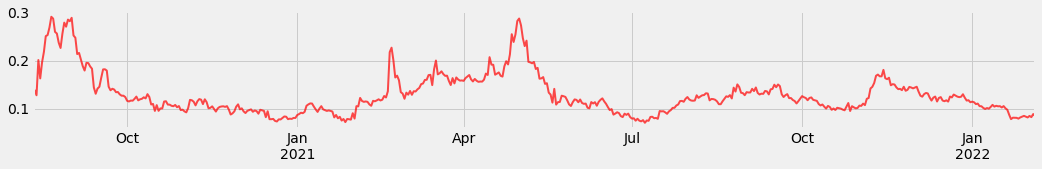

In [45]:
df = df.resample('D').ffill()
df.Close.plot(figsize=(16, 2), color="red", label='Close price', lw=2, alpha =.7)

In [46]:
future_days = 1
columnName = str(future_days)+'_day_price_forecast'

In [47]:
#added new column
df[columnName] = df[['Close']].shift(-future_days)

df[['Close', columnName]]

,Close,1_day_price_forecast
2020-08-11,0.130634,0.138122
2020-08-12,0.138122,0.127606
2020-08-13,0.127606,0.201024
2020-08-14,0.201024,0.162744
2020-08-15,0.162744,0.196316
...,...,...
2022-01-31,0.081419,0.084601
2022-02-01,0.084601,0.082081
2022-02-02,0.082081,0.088527
2022-02-03,0.088527,0.084359


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 543 entries, 2020-08-11 to 2022-02-04
Freq: D
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         543 non-null    object 
 1   Open                         543 non-null    float64
 2   High                         543 non-null    float64
 3   Low                          543 non-null    float64
 4   Close                        543 non-null    float64
 5   Adj Close                    543 non-null    float64
 6   Volume                       543 non-null    int64  
 7   twitter_followers            543 non-null    float64
 8   reddit_average_posts_48h     543 non-null    float64
 9   reddit_average_comments_48h  543 non-null    float64
 10  reddit_subscribers           543 non-null    int64  
 11  reddit_accounts_active_48h   543 non-null    float64
 12  idena_unscaled               543 non-null    int64 

In [49]:
X = np.array(df[["High", "Low", "Volume", "Open", 'Close', "twitter_followers", "reddit_average_posts_48h",
                "reddit_average_comments_48h", "reddit_subscribers", "reddit_accounts_active_48h", 'idena_unscaled',
                'idena_monthly', 'scale', 'idena']])


print(df.shape)

X = X[:df.shape[0] - future_days]
print(X)

(543, 17)
[[1.37770e-01 1.24239e-01 4.07830e+04 ... 3.70000e+01 3.70000e-01
  0.00000e+00]
 [1.62275e-01 1.28384e-01 6.55170e+04 ... 3.70000e+01 3.70000e-01
  0.00000e+00]
 [1.38128e-01 1.18348e-01 4.19880e+04 ... 3.70000e+01 3.70000e-01
  0.00000e+00]
 ...
 [8.55880e-02 8.13300e-02 1.49344e+05 ... 3.00000e+01 3.00000e-01
  0.00000e+00]
 [8.72980e-02 8.15590e-02 1.30836e+05 ... 3.00000e+01 3.00000e-01
  0.00000e+00]
 [8.99600e-02 8.20810e-02 1.41869e+05 ... 3.00000e+01 3.00000e-01
  1.44000e+01]]


In [50]:
y = np.array(df[columnName])
y = y[:-future_days]
print(y)

[0.138122 0.127606 0.201024 0.162744 0.196316 0.218131 0.250788 0.253025
 0.268824 0.29112  0.287222 0.25967  0.256249 0.237235 0.226114 0.255959
 0.27889  0.270433 0.285196 0.281814 0.288933 0.252189 0.247463 0.213458
 0.215829 0.201781 0.188281 0.179111 0.195198 0.194706 0.187714 0.182892
 0.143976 0.130773 0.141561 0.145338 0.164182 0.18149  0.181751 0.179018
 0.145569 0.138025 0.141171 0.139567 0.133987 0.134377 0.129535 0.126744
 0.126741 0.123904 0.116028 0.114721 0.116636 0.116295 0.120187 0.124864
 0.116993 0.11924  0.120294 0.123378 0.121102 0.129947 0.124023 0.108435
 0.109576 0.095044 0.107073 0.095222 0.100276 0.100151 0.114585 0.115198
 0.108259 0.108077 0.10569  0.104818 0.107484 0.102729 0.105178 0.096754
 0.097656 0.09411  0.092027 0.100985 0.11806  0.117199 0.114141 0.106572
 0.115059 0.119643 0.118467 0.109233 0.119238 0.113289 0.100523 0.101419
 0.104538 0.099101 0.093694 0.100268 0.103303 0.104274 0.104665 0.103505
 0.10497  0.097782 0.0875   0.089985 0.094185 0.103

In [51]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, shuffle=False)

In [52]:
from sklearn.preprocessing import StandardScaler


StdS_X = StandardScaler()
StdS_y = StandardScaler()
X_l = StdS_X.fit_transform(x_train)
y_p = StdS_y.fit_transform(y_train.reshape(-1,1))

print("Scaled X_l:")
print(X_l)
print("Scaled y_p:")
print(y_p)


Scaled X_l:
[[-0.08710913  0.01781407 -0.49882644 ... -0.0887346  -0.0887346
  -0.85648877]
 [ 0.37072027  0.11400409 -0.05575474 ... -0.0887346  -0.0887346
  -0.85648877]
 [-0.08042058 -0.1188941  -0.47724071 ... -0.0887346  -0.0887346
  -0.85648877]
 ...
 [ 0.22557126  0.44798882  2.27577259 ... -0.1596524  -0.1596524
   1.81828295]
 [ 0.21985423  0.49307861  1.44211565 ...  1.04595031  1.04595031
  -0.85648877]
 [ 0.11420129  0.06308952  2.08092781 ...  1.04595031  1.04595031
  -0.85648877]]
Scaled y_p:
[[ 1.20603478e-01]
 [-1.01845339e-01]
 [ 1.45119263e+00]
 [ 6.41441703e-01]
 [ 1.35160257e+00]
 [ 1.81306329e+00]
 [ 2.50386883e+00]
 [ 2.55118891e+00]
 [ 2.88539097e+00]
 [ 3.35702646e+00]
 [ 3.27457063e+00]
 [ 2.69175304e+00]
 [ 2.61938737e+00]
 [ 2.21717723e+00]
 [ 1.98193063e+00]
 [ 2.61325289e+00]
 [ 3.09832077e+00]
 [ 2.91942674e+00]
 [ 3.23171391e+00]
 [ 3.16017322e+00]
 [ 3.31076405e+00]
 [ 2.53350470e+00]
 [ 2.43353388e+00]
 [ 1.71421360e+00]
 [ 1.76436824e+00]
 [ 1.46720573

In [53]:

StdS_X_test = StandardScaler()
StdS_y_test = StandardScaler()
StdS_y_result= StandardScaler()
X_l_test = StdS_X_test.fit_transform(x_test)
y_p_test = StdS_y_test.fit_transform(y_test.reshape(-1,1))

print("Scaled X_l_test:")
print(X_l_test)
print("Scaled y_p_test:")
print(y_p_test)

Scaled X_l_test:
[[ 0.68004413  0.33685807 -0.47590737 ...  0.36948687  0.36948687
  -0.94453624]
 [ 0.25414594  0.30372625 -0.1971647  ...  0.36948687  0.36948687
   1.8431629 ]
 [ 0.5689365   0.59956357 -0.3018879  ...  0.36948687  0.36948687
  -0.94453624]
 ...
 [-1.60358058 -1.5212646  -0.62906147 ... -0.80625567 -0.80625567
  -0.94453624]
 [-1.52971042 -1.51005753 -0.79963411 ... -0.80625567 -0.80625567
  -0.94453624]
 [-1.41471488 -1.48451128 -0.69795225 ... -0.80625567 -0.80625567
  -0.0534626 ]]
Scaled y_p_test:
[[ 0.4920672 ]
 [ 0.59687049]
 [ 0.21314482]
 [ 0.21964317]
 [ 0.03137518]
 [-0.06296622]
 [-0.29907318]
 [-0.07716121]
 [ 0.17042158]
 [ 0.40463895]
 [ 0.2985913 ]
 [ 0.22222408]
 [ 0.0092992 ]
 [ 0.22899896]
 [ 0.27997189]
 [ 0.04985632]
 [-0.00471144]
 [-0.05070691]
 [-0.35585315]
 [-0.49204212]
 [-0.39848422]
 [-0.60786035]
 [-0.79142741]
 [-0.53444275]
 [-0.63532859]
 [-0.90858219]
 [-0.78165683]
 [-0.92480504]
 [-0.71427671]
 [-0.75206857]
 [-0.79649705]
 [-0.8920

In [54]:
from sklearn.svm import SVR
svr_linear = SVR(kernel='linear', C = 1e3, gamma="auto")
svr_linear.fit(X_l, y_p)

C:\Users\nikol\Desktop\SIAP - projekat\SIAP_2022\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000.0, gamma='auto', kernel='linear')

In [55]:
from sklearn.linear_model import LinearRegression
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(X_l, y_p)

LinearRegression()

In [56]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction.
# The best possible score is 1.0
lr_confidence = lr.score(X_l_test, y_p_test)
print("lr confidence: ", lr_confidence)

svr_linear_confidence = svr_linear.score(X_l_test, y_p_test)
print('svr_linear confidence', svr_linear_confidence)

lr confidence:  0.9335929573912001
svr_linear confidence 0.9337361692812396


In [57]:
svr_prediction = svr_linear.predict(X_l_test)
print(svr_prediction)

[ 0.23035633  0.36992642  0.46417335  0.09708034  0.0639314  -0.08808344
 -0.10283428 -0.32867593 -0.09198058  0.10446579  0.32124946  0.22663085
  0.12873147 -0.04971924  0.17299371  0.21245778 -0.04049516 -0.06628124
 -0.04075875 -0.3754888  -0.47289332 -0.42327039 -0.58983211 -0.75421437
 -0.54988152 -0.64694095 -0.90816831 -0.80279383 -0.91255236 -0.72295636
 -0.73482193 -0.7990691  -0.89341104 -0.98696671 -0.6772529  -0.30233914
 -0.97985618 -0.61012948 -0.68357111 -0.79764763 -0.78642901 -0.56612762
 -0.56011653 -0.35866447 -0.50307534  0.09417456  0.16616178  1.0368424
  1.25143338  1.61017474  2.2358345   2.37660776  2.19055815  2.20070509
  2.72830284  2.07557551  1.9292374   2.04115808  1.44476665  1.47165988
  1.44252276  1.20244571  1.03356527  1.0494238   0.93009554  1.28111807
  0.94652137  0.95033441  1.17912188  1.16961939  1.08980839  1.16628682
  1.20997758  0.82589739  0.41262202  0.31163328  0.5402823   0.6591413
  0.60917873  0.26419825 -0.0116994   0.24157862  0.3

In [58]:
final_prediction =svr_prediction.reshape(-1,1)
final_prediction = StdS_y.inverse_transform(final_prediction)
print(final_prediction)


[[0.14331043]
 [0.14990844]
 [0.15436385]
 [0.13700997]
 [0.1354429 ]
 [0.12825658]
 [0.12755925]
 [0.11688286]
 [0.12807234]
 [0.13735911]
 [0.1476073 ]
 [0.14313432]
 [0.13850624]
 [0.1300702 ]
 [0.14059868]
 [0.1424643 ]
 [0.13050626]
 [0.12928725]
 [0.13049379]
 [0.11466983]
 [0.11006515]
 [0.11241102]
 [0.10453701]
 [0.09676604]
 [0.10642563]
 [0.10183726]
 [0.08948805]
 [0.0944695 ]
 [0.0892808 ]
 [0.09824372]
 [0.09768279]
 [0.09464559]
 [0.09018568]
 [0.08576295]
 [0.1004043 ]
 [0.1181279 ]
 [0.08609909]
 [0.10357748]
 [0.10010561]
 [0.09471278]
 [0.09524313]
 [0.10565761]
 [0.10594178]
 [0.11546518]
 [0.10863833]
 [0.1368726 ]
 [0.14027571]
 [0.18143609]
 [0.19158062]
 [0.20853969]
 [0.238117  ]
 [0.24477189]
 [0.23597661]
 [0.2364563 ]
 [0.26139785]
 [0.23054095]
 [0.22362299]
 [0.22891391]
 [0.20072022]
 [0.20199156]
 [0.20061414]
 [0.18926479]
 [0.18128117]
 [0.18203086]
 [0.17638976]
 [0.19298393]
 [0.17716627]
 [0.17734653]
 [0.18816218]
 [0.18771296]
 [0.18394   ]
 [0.18

In [59]:
print(y_test)

[0.12774  0.130014 0.121688 0.121829 0.117744 0.115697 0.110574 0.115389
 0.120761 0.125843 0.123542 0.121885 0.117265 0.122032 0.123138 0.118145
 0.116961 0.115963 0.109342 0.106387 0.108417 0.103874 0.099891 0.105467
 0.103278 0.097349 0.100103 0.096997 0.101565 0.100745 0.099781 0.097707
 0.096369 0.103675 0.111446 0.094877 0.104885 0.102456 0.100415 0.101163
 0.106084 0.105497 0.110238 0.107113 0.120231 0.121955 0.141773 0.145178
 0.153243 0.168202 0.170722 0.167073 0.167064 0.180508 0.162993 0.161209
 0.164109 0.148449 0.150761 0.150013 0.144099 0.140376 0.140984 0.138258
 0.145365 0.137012 0.138892 0.14501  0.143819 0.14198  0.14372  0.145367
 0.135216 0.126746 0.124666 0.130011 0.132412 0.131441 0.122934 0.116543
 0.1227   0.12498  0.114646 0.122094 0.12377  0.116659 0.115223 0.117144
 0.114408 0.124943 0.123143 0.12912  0.127005 0.124774 0.123719 0.124579
 0.129716 0.122558 0.116641 0.117279 0.113121 0.114321 0.113054 0.109236
 0.110288 0.104968 0.104755 0.10125  0.09906  0.101

In [60]:
print(len(final_prediction))
print(len(y_test))

136
136


In [61]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,twitter_followers,reddit_average_posts_48h,reddit_average_comments_48h,reddit_subscribers,reddit_accounts_active_48h,idena_unscaled,idena_monthly,scale,idena,1_day_price_forecast
2020-08-11,2020-08-11,0.125496,0.137770,0.124239,0.130634,0.130634,40783,1817.0,0.273,0.000,298,6.666667,0,37.0,0.37,0.00,0.138122
2020-08-12,2020-08-12,0.130674,0.162275,0.128384,0.138122,0.138122,65517,1829.0,0.182,0.091,300,6.750000,0,37.0,0.37,0.00,0.127606
2020-08-13,2020-08-13,0.138128,0.138128,0.118348,0.127606,0.127606,41988,2149.0,0.083,0.167,302,6.615385,0,37.0,0.37,0.00,0.201024
2020-08-14,2020-08-14,0.127084,0.201024,0.121670,0.201024,0.201024,104705,2208.0,0.000,0.000,304,7.083333,34,37.0,0.37,12.58,0.162744
2020-08-15,2020-08-15,0.201097,0.202423,0.138915,0.162744,0.162744,50419,2267.0,0.100,0.000,307,5.636364,0,37.0,0.37,0.00,0.196316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31,2022-01-31,0.083146,0.083205,0.078528,0.081419,0.081419,157240,9584.0,0.091,0.000,925,10.083333,54,30.0,0.30,16.20,0.084601
2022-02-01,2022-02-01,0.081419,0.085588,0.081330,0.084601,0.084601,149344,9593.0,0.083,0.167,926,10.153846,0,30.0,0.30,0.00,0.082081
2022-02-02,2022-02-02,0.084601,0.087298,0.081559,0.082081,0.082081,130836,9571.0,0.200,0.100,926,8.727273,0,30.0,0.30,0.00,0.088527
2022-02-03,2022-02-03,0.082081,0.089960,0.082081,0.088527,0.088527,141869,9549.0,0.200,0.000,925,8.818182,48,30.0,0.30,14.40,0.084359


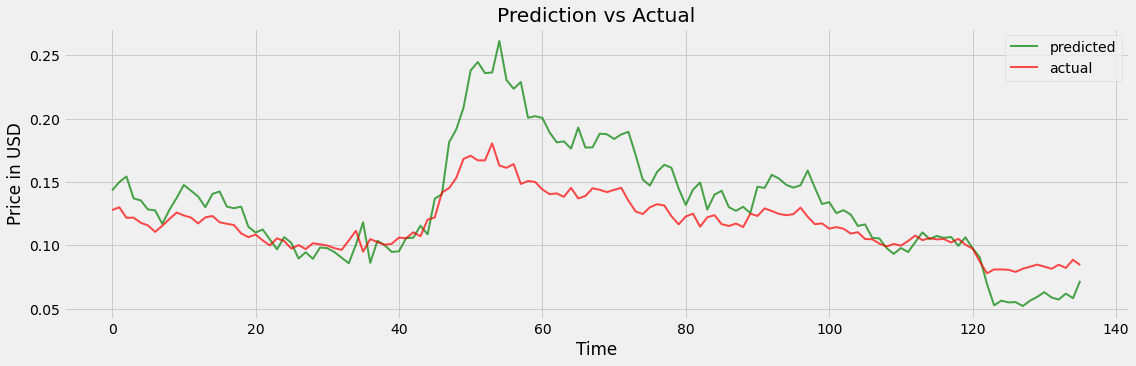

In [62]:
plt.figure(figsize=(17,5))
plt.plot(final_prediction, label='Prediction', lw=2, alpha =.7, color = "green")
plt.plot(y_test, label='Actual', lw=2, alpha =.7, color = "red")
plt.legend(['predicted', "actual"])
plt.title('Prediction vs Actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')

plt.show()

In [63]:
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error


print("R^2")
print(svr_linear_confidence)

print("\nMAE")
print(mean_absolute_error(y_test,final_prediction))

print("\nRMSE")
print(sqrt(mean_squared_error(y_test, final_prediction)))

R^2
0.9337361692812396

MAE
0.021787600983587473

RMSE
0.02887072222548099
